# detM-v2

*Prepares histogram of the determinants of a massive overlap Dirac operator*

## Function definitions

- load the necessary modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

- read complex eigenvalues of one configuration:

In [2]:
def readCEVs(eigFile):
# eigFile - name of .eig file with eigenvalues
    cevs = np.loadtxt(eigFile)
    return np.array([np.complex128(cev[0] + cev[1] * 1j) for cev in cevs])

- read complex eigenvalues of all configurations at once:

In [3]:
def readAllCEVs(eigFilesList):
# eigFilesList - list of .eig file names
    f = open(eigFilesList, "r")
    allCEVs = []
    for eigFileName in f:
        allCEVs.append(readCEVs(eigFileName.strip()))
    f.close()
    return allCEVs

- absolute value of topological charge is equal to the number of zero modes:

In [4]:
def countZeros(cevs):
# cevs - complex eigenvalues of one configuration
    return len([cev for cev in cevs if abs(cev) < 1e-12])

- computes determinant of a massive overlap operator using eigenvalues:

In [5]:
def detM(cevs, qm, nmz, out):
# cevs - complex eigenvalues
# qm - quark mass
# nmz - numerical normalization (about 0.63 is optimal)
# out - print complex p if True
    f = 1.0 - qm / 2.0
    p = np.complex128(1 + 0j)
    for i in range(len(cevs)):
        p *= (f * cevs[i] + qm) * nmz
    if out: print(p)
    return p.real

- computes normalized determinants (max = 1) of an ensemble:

In [6]:
def detEnMax1(allCEVs, qm):
# allCEVs - eigenvalues for all configurations
# qm - quark mass
    dets = [detM(cevs, qm, 0.63, False) for cevs in allCEVs]
    dmax = max(dets)
    return [d / dmax for d in dets]

- sort determinants according to absolute topological charge:

In [7]:
def QdetEnMax1(allCEVs, qm):
# allCEVs - eigenvalues for all configurations
# qm - quark mass

    # compute determinants for all configuration
    dets = [detM(cevs, qm, 0.63, False) for cevs in allCEVs]

    # normalize determinants to max is equal to one
    dmax = max(dets)
    dets = [d / dmax for d in dets]

    # compute absolute topological charge
    Qs = [countZeros(cevs) for cevs in allCEVs]

    # find maximal topological charge
    Qmax = int(max(Qs))
    print("Qmax =", Qmax)

    # create Qmax + 1 empty lists
    Qdet = []
    for i in range(Qmax + 1): Qdet.append([])

    # add determinants according to topological charge
    for i in range(len(dets)):
        Qdet[Qs[i]].append(dets[i])
        
    # how many entries are in each topological sector
    print([len(Qdet[i]) for i in range(Qmax + 1)])
    print()
    
    return Qdet

## Examples

- read complex eigenvalues of one configuration:

In [8]:
cevs = readCEVs("/mnt/e/Jaime/b4_20x20Ov/Eig/L020x020_b04000i00001-HO.eig")
cevs[0]

(0.00213644822675577-0.0653324731085987j)

- compute determinant for quark mass 0.05:

In [9]:
detM(cevs, 0.05, 0.63, True)

(2.6583807559420576-1.992850329202156e-14j)


2.6583807559420576

- compute absolute value of topological charge:

In [10]:
countZeros(cevs)

1

## Results

- read complex eigenvalues of all configurations from an ensemble:

In [11]:
%%time
allCEVs = readAllCEVs("/mnt/e/Jaime/b4_20x20Ov/eigFiles.list")

CPU times: user 50 s, sys: 5.55 s, total: 55.6 s
Wall time: 1min 55s


#### Quark mass = 0.05

- compute determinants normalized to *max* = 1 for quark mass 0.05:

In [12]:
%%time
dets = detEnMax1(allCEVs, 0.05)

CPU times: user 3.11 s, sys: 16 ms, total: 3.13 s
Wall time: 3.13 s


In [13]:
dets[:10]

[0.01520670613357288,
 0.019749360256504034,
 0.009750188723213512,
 0.024755490133428804,
 0.008313437300582396,
 0.001942756592798554,
 0.005893719774442306,
 0.018367616653706186,
 0.00022440915512308182,
 0.06696043871009695]

- plot the histogram:

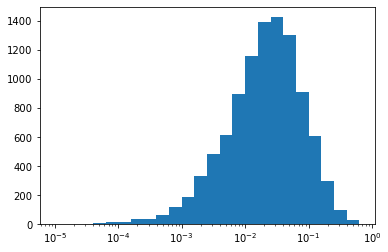

In [14]:
plt.xscale('log')
plt.hist(dets, bins = [10.0**r for r in np.arange(-5.0, 0, 0.2)]);

#### Quark mass = 0.01

In [15]:
%%time
dets = detEnMax1(allCEVs, 0.01)

CPU times: user 3.12 s, sys: 4.87 ms, total: 3.12 s
Wall time: 3.12 s


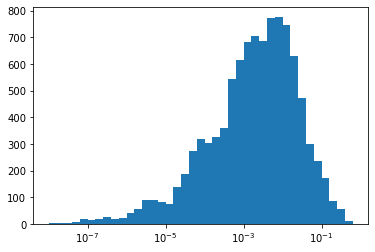

In [16]:
plt.xscale('log')
plt.hist(dets, bins = [10.0**r for r in np.arange(-8.0, 0, 0.2)]);

### Topology

#### Quark mass = 0.05

In [17]:
%%time
Qdet = QdetEnMax1(allCEVs, 0.05)

Qmax = 7
[2307, 3844, 2365, 1050, 335, 78, 17, 4]

CPU times: user 3.99 s, sys: 6.61 ms, total: 3.99 s
Wall time: 3.99 s


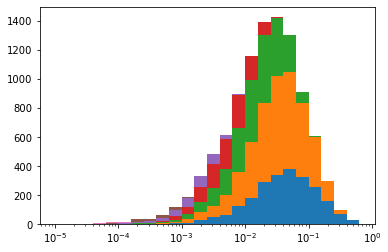

In [18]:
plt.xscale('log')
plt.hist([Qdet[i] for i in range(len(Qdet))], stacked = True, bins = [10.0**r for r in np.arange(-5.0, 0, 0.2)]);

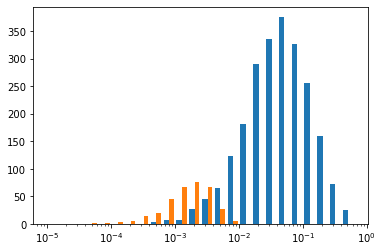

In [19]:
plt.xscale('log')
plt.hist([Qdet[0], Qdet[4]], stacked = False, bins = [10.0**r for r in np.arange(-5.0, 0, 0.2)]);

#### Quark mass = 0.01

In [20]:
%%time
Qdet = QdetEnMax1(allCEVs, 0.01)

Qmax = 7
[2307, 3844, 2365, 1050, 335, 78, 17, 4]

CPU times: user 3.99 s, sys: 5.96 ms, total: 4 s
Wall time: 4 s


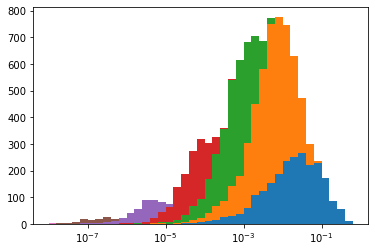

In [21]:
plt.xscale('log')
plt.hist([Qdet[i] for i in range(len(Qdet))], stacked = True, bins = [10.0**r for r in np.arange(-8.0, 0, 0.2)]);

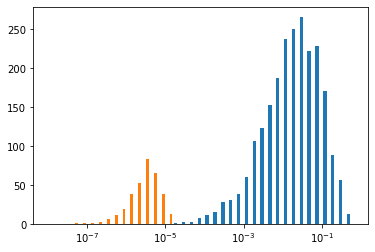

In [22]:
plt.xscale('log')
plt.hist([Qdet[0], Qdet[4]], stacked = False, bins = [10.0**r for r in np.arange(-8.0, 0, 0.2)]);

*Hip, 2023-08-04*